# Netflix Movies & TV Shows Data Analysis

This notebook analyzes Netflix's movie and TV show dataset to explore content trends, popular genres, ratings distribution, and movie durations. 

We'll cover:
- Data loading and cleaning
- Exploratory Data Analysis (EDA) with visualizations
- Duration analysis by release year
- Key insights for portfolio presentation


In [34]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set seaborn style for all plots
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


## Load Dataset

We load the Netflix data CSV file. The dataset contains details like title, director, cast, country, release year, rating, and more.


In [2]:
netflix_data = pd.read_csv("netflix_titles_nov_2019.csv")
print(f"Data has {netflix_data.shape[0]} rows and {netflix_data.shape[1]} columns")
netflix_data.head()


Data has 5837 rows and 12 columns


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


## Basic Information.


In [3]:
# Summary
netflix_data.info()

# Check for missing values
netflix_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

## Data Cleaning

Letnd clean the dataset by:
- Filling missing values where appropriate
- Dropping rows critical for time analysis with missing date_added
- Converting date columns to datetime format
- Trimming whitespace from text columns


In [4]:

# Fill with placeholders
netflix_data['director'] = netflix_data['director'].fillna('Unknown')
netflix_data['cast'] = netflix_data['cast'].fillna('Not Available')
netflix_data['country'] = netflix_data['country'].fillna('Unknown')
netflix_data['rating'] = netflix_data['rating'].fillna('Not Rated')

# Drop rows missing date_added for time-based analysis
netflix_data = netflix_data.dropna(subset=['date_added'])

# Convert date_added to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

# Extract year and month from date_added
netflix_data['added_year'] = netflix_data['date_added'].dt.year
netflix_data['added_month'] = netflix_data['date_added'].dt.month

# Convert release_year to int
netflix_data['release_year'] = netflix_data['release_year'].astype(int)

# Trim whitespace in key text columns
for col in ['title', 'director', 'cast', 'country', 'listed_in', 'description']:
    netflix_data[col] = netflix_data[col].str.strip()

print("Netflix Data after Cleaning")
print(netflix_data.isnull().sum())


Netflix Data after Cleaning
show_id         0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
type            0
added_year      0
added_month     0
dtype: int64


## Movies vs TV Shows Distribution

Let's explore how many movies vs TV shows are on Netflix.


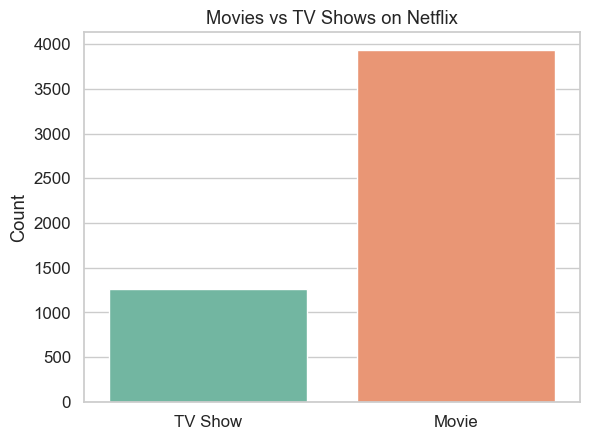

In [5]:
sns.countplot(x='type', data=netflix_data, hue='type', palette='Set2')
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel('')
plt.ylabel('Count')
plt.show()


## Top Countries by Number of Titles

Which countries produce the most content on Netflix? Let's find out.


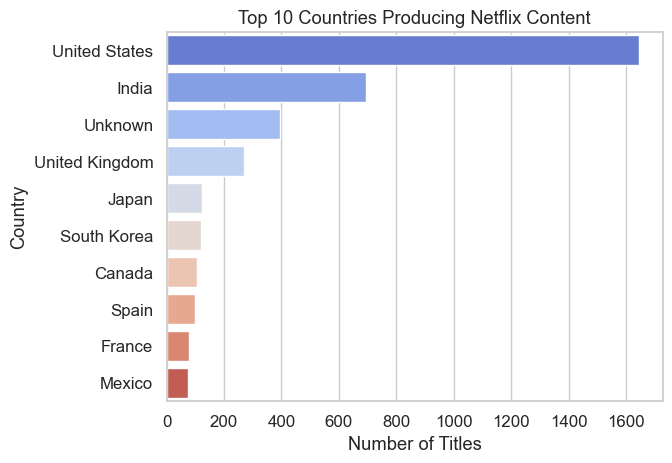

In [6]:
top_countries = netflix_data['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


## Trend of Content Added Over Time

We analyze how many titles were added each year to Netflix.


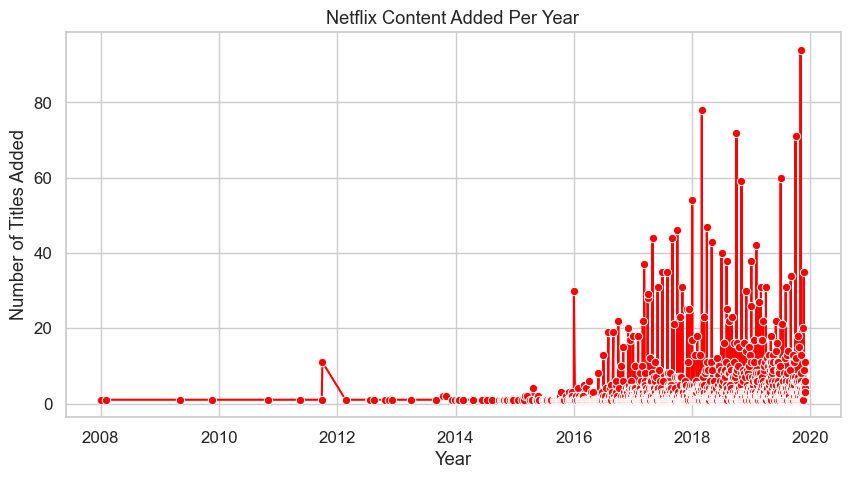

In [7]:
content_per_year = netflix_data['date_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=content_per_year.index, y=content_per_year.values, marker='o', color = "red")
plt.title("Netflix Content Added Per Year")
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()


## Top 10 Genres on Netflix

Netflix content is categorized into genres (sometimes multiple per show/movie).  
We’ll extract individual genres from the `listed_in` column and see which are most popular.


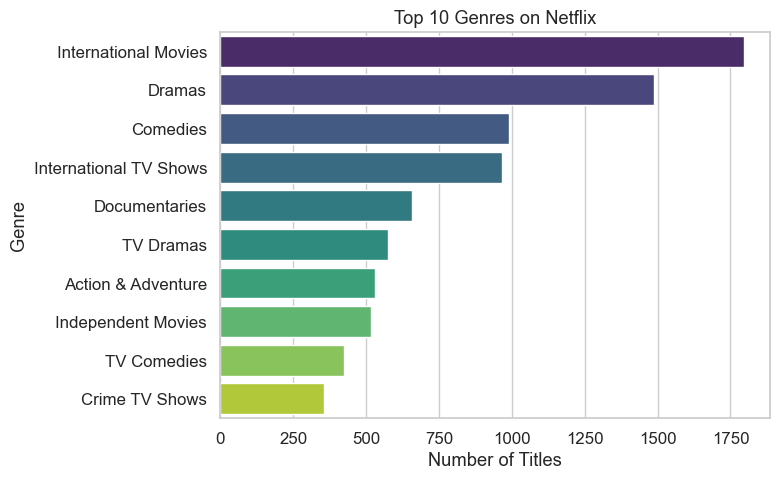

In [43]:
from collections import Counter

# Extract individual genres
all_genres = []
for genres in netflix_data['listed_in'].str.split(', '):
    if isinstance(genres, list):  # Safety for nulls
        for g in genres:
            all_genres.append(g)
            
# Count occurrences
genre_counts = Counter(all_genres)

# Prepare top genres DataFrame
top_genres = pd.DataFrame(genre_counts.items(), columns=['Genre','Count'])
top_genres = top_genres.sort_values(by='Count', ascending=False).head(10)

# Barplot for top 10 genres
plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


## Distribution of Content Ratings

Explore the ratings (TV-MA, TV-PG, R, etc.) to understand what kind of audiences Netflix content is targeting.


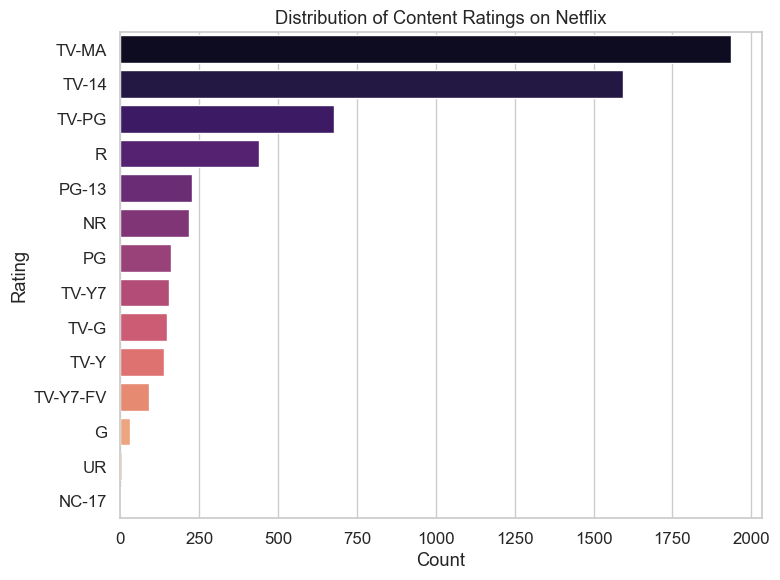

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(y='rating', 
              data=netflix_data, 
              order=netflix_data['rating'].value_counts().index, 
              palette='magma')
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


## Top 10 Directors with Most Netflix Titles

Find out which directors work appears most often on Netflix.


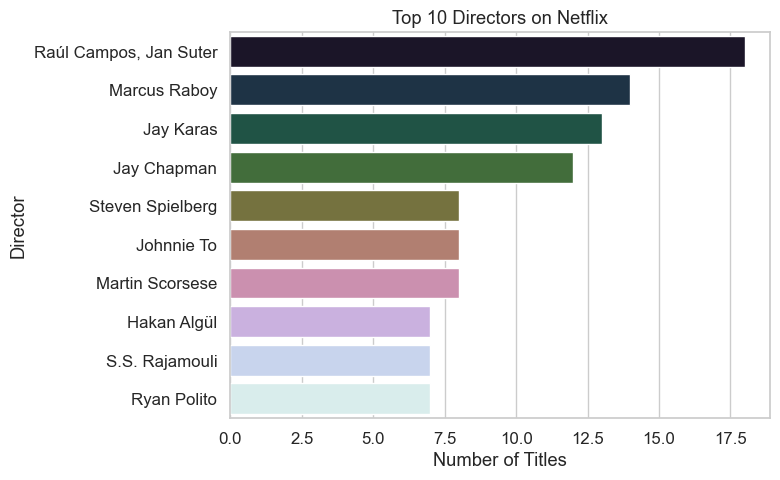

In [47]:
top_directors = netflix_data[netflix_data['director'] != "Unknown"]['director'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.tight_layout()
plt.show()


## Duration Analysis of Movies and TV Shows

Let's see how long movies typically run, plus how many seasons TV shows have.


Text(0, 0.5, 'Number of movies')

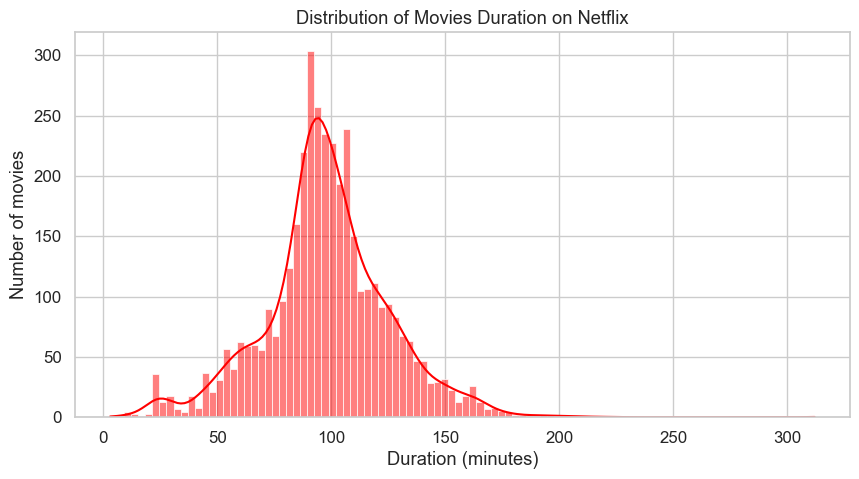

In [11]:
movies = netflix_data[netflix_data["type"]=="Movie"].copy()
movies["duration_minutes"] = movies["duration"].str.replace("min", "").astype(int)

plt.figure(figsize = (10,5))
sns.histplot(movies["duration_minutes"], bins = 100, kde = True, color = "red")
plt.title("Distribution of Movies Duration on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of movies")

C:\Users\HP\AppData\Local\Temp\ipykernel_112\1550198844.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_movies['duration_minutes'] = recent_movies['duration'].str.replace(" min","").astype(int)


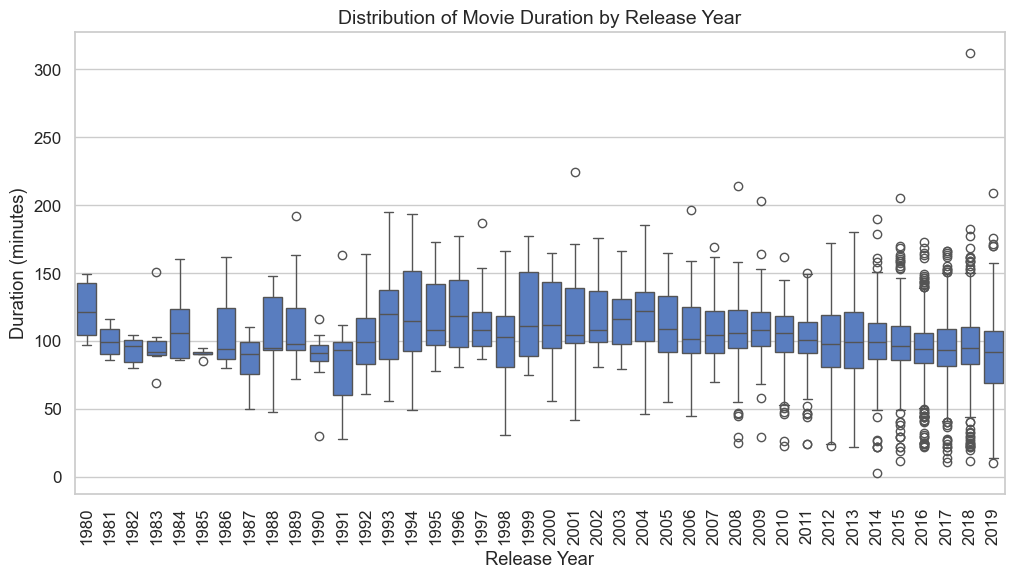

In [42]:
# Work with Movies only
movies = netflix_data[netflix_data['type']=="Movie"].copy()
recent_movies = movies[movies['release_year'] >= 1980]

# Extract duration (strip " min" and convert to int)
recent_movies['duration_minutes'] = recent_movies['duration'].str.replace(" min","").astype(int)

# --- Boxplot of Duration vs Release Year ---
plt.figure(figsize=(12,6))
sns.boxplot(x='release_year', y='duration_minutes', data=recent_movies)
plt.title("Distribution of Movie Duration by Release Year", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.xticks(rotation=90)
plt.show()


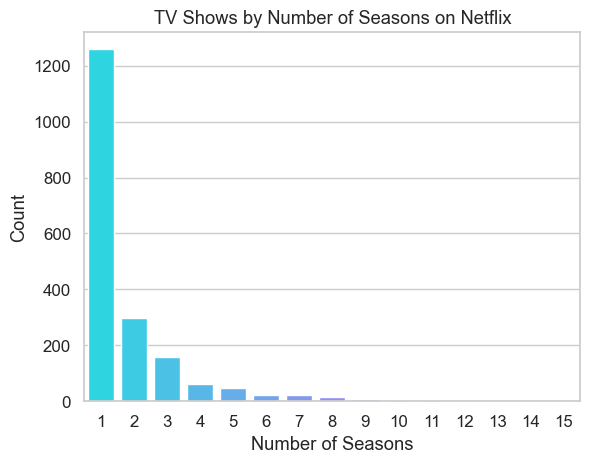

In [37]:
tv_shows = netflix_data[netflix_data["type"]=="TV Show"].copy()
tv_shows["seasons"] = tv_shows["duration"].str.replace("Season","").str.replace("s","").astype(int)

sns.countplot(x='seasons', data=tv_shows, palette="cool")
plt.title("TV Shows by Number of Seasons on Netflix")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()

## Conclusion & Key Insights

- Netflix offers a larger catalog of movies compared to TV shows.
- The USA produces the most Netflix content, followed by India and the UK.
- Content addition peaked between 2017–2020, then stabilized.
- Genre analysis shows Drama, Comedy, and Documentaries are the most common.
- TV-MA and TV-14 are the most frequent ratings.
- Most Netflix movies run 90–120 minutes; most TV shows have 1 season.
- Movie duration shows a slight decline in recent years, reflecting shifting viewer habits.


---
**Analysis by Ishan | Data Science Portfolio**

